# **Presentación del Caso**

Todas las empresas aspiran a tener un personal motivado para mejorar su productividad y para ello existen herramientas en el mercado que miden el **clima laboral** de las empresas. Las variables consideradas son:
1.   **Socio-demográficas:** Edad, Sexo y  Grado de instrucción de los empleados
2.   **Organizacionales:** Tipo de cargo, experiencia y gerencia donde trabaja dentro de la empresa
3.   **Psicométricas:** CREDIBILIDAD, RESPETO, IMPARCIALIDAD, ORGULLO, CAMARADERIA,	GENERAL. Todos indicadores que reflejan el sentir del empleado respecto a la empresa donde trabaja.

El objetivo del estudio es identificar la cantidad de trabajadores identificados (target) como:
1.   **PROMOTOR:** Es un empleado que recondaría trabajar a alguien en la empresa y se siente a gusto con su trabajo
2.   **DETRACTOR:** Lo contrario a PROMOTOR

En esta sesión trabajaremos con data generada por una encuesta sobre un total de **475 empleados** (125 sin target).

![Image of Yaktocat](https://s3.amazonaws.com/media.greatplacetowork.com/images/GPTW_Logo_2017.svg)

# **Comprensión de los datos**

In [1]:
"CELDA N°1"
#Con la librería pandas (pd) leemos los datos indicando el índice y el encoding latin1 por ser idioma español (ñ y tildes)
import pandas as pd
train=pd.read_csv("https://raw.githubusercontent.com/hackspaceperu/Datasets_intro_Data_Science/master/train_nlp.csv", index_col="ID", encoding="latin1")
test=pd.read_csv("https://raw.githubusercontent.com/hackspaceperu/Datasets_intro_Data_Science/master/test_nlp.csv", index_col="ID", encoding="latin1")

In [2]:
"CELDA N°2"
#Con el método shape podemos identificar rápidamente el tamaño de train y test
train.shape, test.shape

((350, 14), (125, 13))

In [3]:
"CELDA N°3"
#Con el método info podemos identificar las columnas y la cantidad de registros en cada una, así como el tipo de dato
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 3 to 684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEXO               350 non-null    object 
 1   EDAD               350 non-null    object 
 2   GRADO_INSTRUCCION  350 non-null    object 
 3   TIPO_CARGO         350 non-null    object 
 4   EXPERIENCIA        350 non-null    object 
 5   GERENCIA           350 non-null    object 
 6   CREDIBILIDAD       350 non-null    float64
 7   RESPETO            350 non-null    float64
 8   IMPARCIALIDAD      350 non-null    float64
 9   ORGULLO            350 non-null    float64
 10  CAMARADERIA        350 non-null    float64
 11  GENERAL            350 non-null    float64
 12  COMENTARIO         350 non-null    object 
 13  TARGET             350 non-null    object 
dtypes: float64(6), object(8)
memory usage: 41.0+ KB


# **Preprocesamiento de datos ESTRUCTURADOS**

## I. **Verificación de vacíos**

In [4]:
"CELDA N°4"
#Podemos verificar rápidamente los vacíos con la el método isna().sum()
for col in train.columns:
  print('En la columna',col,'hay',train[col].isna().sum(),'nulos')

En la columna SEXO hay 0 nulos
En la columna EDAD hay 0 nulos
En la columna GRADO_INSTRUCCION hay 0 nulos
En la columna TIPO_CARGO hay 0 nulos
En la columna EXPERIENCIA hay 0 nulos
En la columna GERENCIA hay 0 nulos
En la columna CREDIBILIDAD hay 0 nulos
En la columna RESPETO hay 0 nulos
En la columna IMPARCIALIDAD hay 0 nulos
En la columna ORGULLO hay 0 nulos
En la columna CAMARADERIA hay 0 nulos
En la columna GENERAL hay 0 nulos
En la columna COMENTARIO hay 0 nulos
En la columna TARGET hay 0 nulos


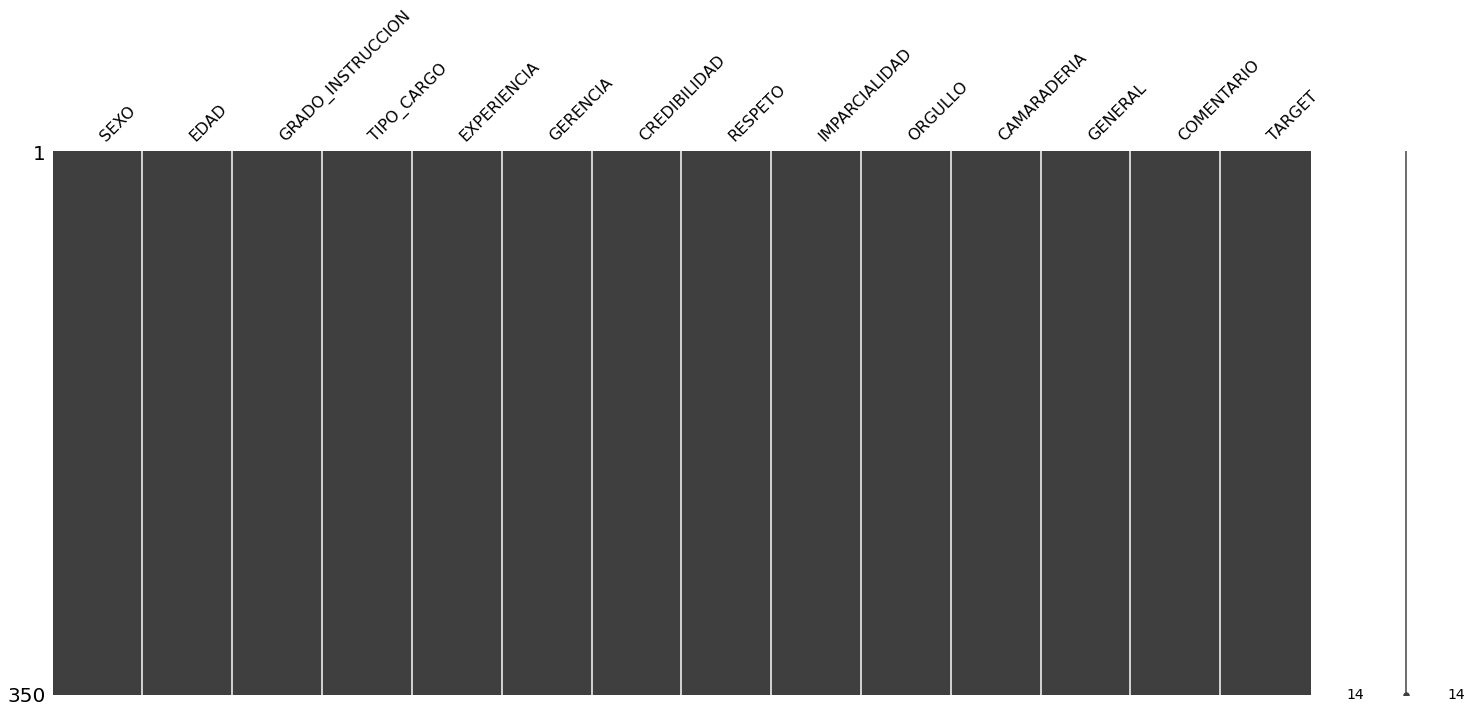

In [5]:
"CELDA N°5"
#Otra alternativa es usar la librería missingno (ms)
import missingno as ms
ms.matrix(train)

Como puede apreciarse tras ambos gráficos **no existe ningún valor perdido** tanto en train como test.

## II. **Verificación de outliers**

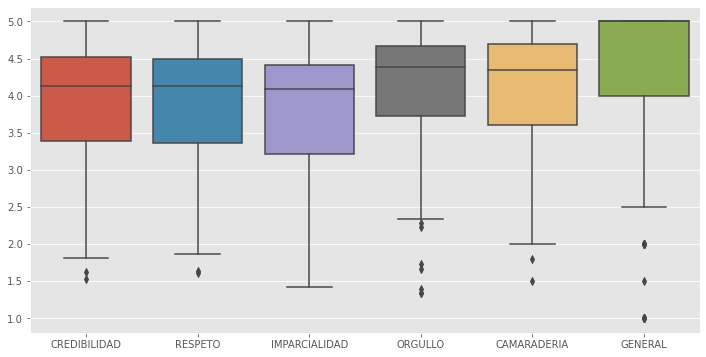

In [6]:
"CELDA N°6"
#Podemos verificar rápidamente los outliers con la el método boxplot de la librería seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.boxplot(data=train, orient='v')
plt.show()

Como puede apreciarse en los diagramas **no existe una cantidad significativa de outliers** tanto en train como test.

## III. **Encoding de variables categóricas**

### *Ordinal Encoding*

Para aplicar el **Ordinal Encoding** es necesario asegurarse que las columnas categóricas tienen una clara **jerarquía** donde cada palabra signfica un orden o nivel. Para nuestro ejemplo usaremos las siguientes variables:
1.   EDAD
2.   GRADO_INSTRUCCION
3.   TIPO_CARGO
4.   EXPERIENCIA



In [7]:
"CELDA N°7"
#Definimos las listas de valores presentes en cada columna según el orden requerido de menor a mayor y de izquierda a derecha respectivamente
edad = ['menor de 23', 'de 23 a 30', 'de 31 a 38', 'de 39 a 45', 'mayor de 45']
grado = ['Secundaria o menor', 'Tecnico incompleto', 'Tecnico completo', 'Universitaria incompleta', 'Universitaria completa', 'Postgrado']
cargo = ['Auxiliar', 'Tecnico', 'Asistente', 'Analista', 'Jefe']
experiencia = ['menor de 1', 'de 1 a 3', 'de 4 a 6', 'de 7 a 9', 'de 10 a 15', 'mayor de 15']

In [8]:
"CELDA N°8"
#Importamos la librería OrdinalEncoder y asignamos las listas
from sklearn.preprocessing import OrdinalEncoder
orden = OrdinalEncoder(categories=[edad, grado, cargo, experiencia])

In [9]:
"CELDA N°9"
#Generamos los números partiendo de 0 para cada columna y las asignamos a train respectivamente
train[['EDAD', 'GRADO_INSTRUCCION', 'TIPO_CARGO', 'EXPERIENCIA']]=orden.fit_transform(train[['EDAD', 'GRADO_INSTRUCCION', 'TIPO_CARGO', 'EXPERIENCIA']])
test[['EDAD', 'GRADO_INSTRUCCION', 'TIPO_CARGO', 'EXPERIENCIA']]=orden.fit_transform(test[['EDAD', 'GRADO_INSTRUCCION', 'TIPO_CARGO', 'EXPERIENCIA']])

In [10]:
"CELDA N°10"
#Comprobamos el encoding
train.head()

,SEXO,EDAD,GRADO_INSTRUCCION,TIPO_CARGO,EXPERIENCIA,GERENCIA,CREDIBILIDAD,RESPETO,IMPARCIALIDAD,ORGULLO,CAMARADERIA,GENERAL,COMENTARIO,TARGET
ID,,,,,,,,,,,,,,
3,Femenino,1.0,5.0,4.0,0.0,Recursos Humanos,5.00000,5.000000,4.958333,5.000000,5.00,5.0,El compañerismo entusiasmo vocación de servicio.,PROMOTOR
8,Masculino,4.0,4.0,4.0,4.0,Recursos Humanos,4.59375,4.800000,4.833333,4.722222,4.70,5.0,Ahora se nota otro ambiente es su gente lo que...,PROMOTOR
10,Femenino,2.0,4.0,4.0,0.0,Recursos Humanos,4.62500,4.366667,4.750000,4.944444,4.95,5.0,Camaradería sabes que somos los mejores en el ...,PROMOTOR
16,Masculino,1.0,4.0,3.0,0.0,Recursos Humanos,4.37500,4.066667,4.333333,4.277778,4.90,5.0,La cultura que reina en la empresa busca el co...,PROMOTOR
17,Femenino,2.0,2.0,3.0,1.0,Recursos Humanos,4.87500,4.666667,4.666667,4.888889,5.00,5.0,La acogida del personal que labora en todas la...,PROMOTOR


# **Preprocesamiento de datos NO ESTRUCTURADOS**

In [11]:
"CELDA N°11"
#Instalamos Spacy
!pip install --upgrade spacy

     |████████████████████████████████| 10.4MB 6.1MB/s 
     |████████████████████████████████| 1.1MB 46.0MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [12]:
"CELDA N°12"
#Descargamos el conjunto de palabras entrenadas en español
!python -m spacy download es_core_news_lg

     |████████████████████████████████| 573.1MB 1.2MB/s 
  Created wheel for es-core-news-lg: filename=es_core_news_lg-2.3.1-cp36-none-any.whl size=573139081 sha256=3333cb3f4d2004bb7a1ace7fd4620355a320f50c28739dc32664229309db2e12
  Stored in directory: /tmp/pip-ephem-wheel-cache-cq2gf25s/wheels/48/59/33/558e7f48e924c6cac0cbd3679ee7c84f5ae02964c335232e5a
Successfully built es-core-news-lg
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_lg')


In [13]:
"CELDA N°13"
#Descargamos las librerías necesarias para el procesamiento de palabras
import spacy
import es_core_news_lg
nlp = es_core_news_lg.load()

## I. **Remover stopwords**

In [14]:
"CELDA N°14"
#Importamos la librería STOP_WORDS
from spacy.lang.es.stop_words import STOP_WORDS

In [15]:
"CELDA N°15"
#Añadimos unos stopwords personalizados
stop_list = ["a", "y", "o", "Y", "A", "e", "O"]
nlp.Defaults.stop_words.update(stop_list)

In [16]:
"CELDA N°16"
#Actualizamos la lista de stopwords
for word in STOP_WORDS:
    lexeme = nlp.vocab[word]
    lexeme.is_stop = True

In [17]:
"CELDA N°17"
#Definimos la función para aplicar los stopwords y filtrado
def remove_stopwords(doc):
    doc = [token.text.lower() for token in doc if (not token.is_stop) and token.is_alpha]
    return doc

In [18]:
"CELDA N°18"
#Añadimos el pipeline stopwords a nlp de SpaCy
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [19]:
"CELDA N°19"
#Aplicamos el pipeline a train y test
corpus_train = []
for doc in nlp.pipe(train.COMENTARIO.values, disable=["tagger", "parser", "ner"]):
    corpus_train.append(" ".join(doc))
train["CORPUS"] = corpus_train

corpus_test = []
for doc in nlp.pipe(test.COMENTARIO.values, disable=["tagger", "parser", "ner"]):
    corpus_test.append(" ".join(doc))
test["CORPUS"] = corpus_test

## II. **Identificación de palabras frecuentes (WordCloud)**

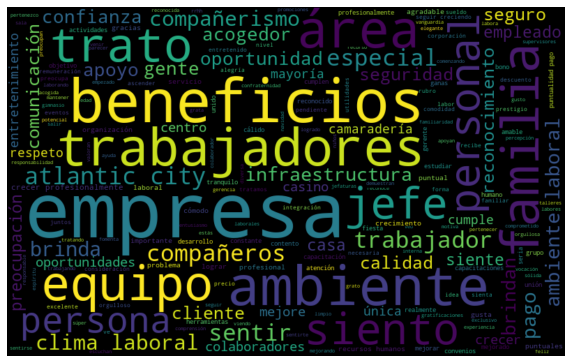

In [20]:
"CELDA N°20"
#Graficamos el WordCloud para los empleados con target PROMOTOR
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_words = ' '.join(train[train['TARGET']=='PROMOTOR'].CORPUS.values)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

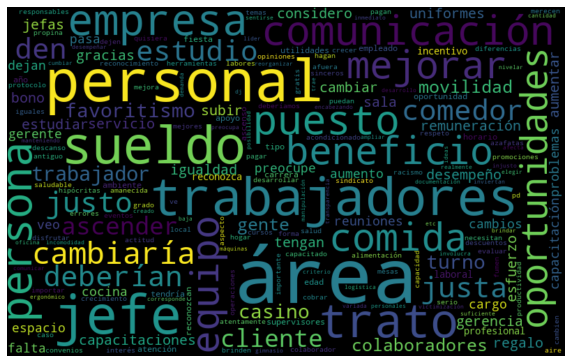

In [21]:
"CELDA N°21"
#Graficamos el WordCloud para los empleados con target DETRACTOR 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_words = ' '.join(train[train['TARGET']=='DETRACTOR'].CORPUS.values)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## III. **Análisis de Sentimiento**

In [22]:
"CELDA N°21"
#Instalamos la librería de análisis de sentimientos
!pip install spanish_sentiment_analysis

     |████████████████████████████████| 15.8MB 336kB/s 
     |████████████████████████████████| 276kB 45.3MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=861216 sha256=722d2f11ee289cd610b2491890ed6fc2ccb7bea3bb51ba8a4ddc04142608adce
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie


In [23]:
"CELDA N°22"
#Importamos el modelo SentimentClassifier y lo guardamos en la variable clf
from classifier import SentimentClassifier
clf = SentimentClassifier()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Will download some functions from the nltk package if not found on the computer
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [24]:
"CELDA N°23"
#Ejecutamos el modelo SentimentClassifier sobre train y test
train["SCORE_SENTIMENT"] = train.COMENTARIO.apply(lambda s: round(clf.predict(s),4))
test["SCORE_SENTIMENT"] = test.COMENTARIO.apply(lambda s: round(clf.predict(s),4))

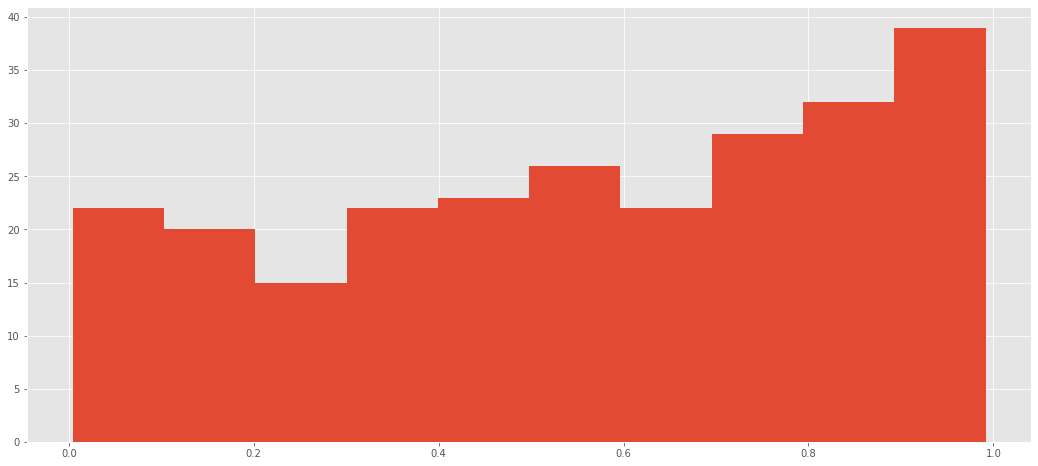

In [25]:
"CELDA N°24"
#Visualizamos los rangos de análisis de sentimiento para PROMOTOR
plt.figure(figsize=(18, 8))
plt.hist(train[train['TARGET']=="PROMOTOR"].SCORE_SENTIMENT)
plt.show()

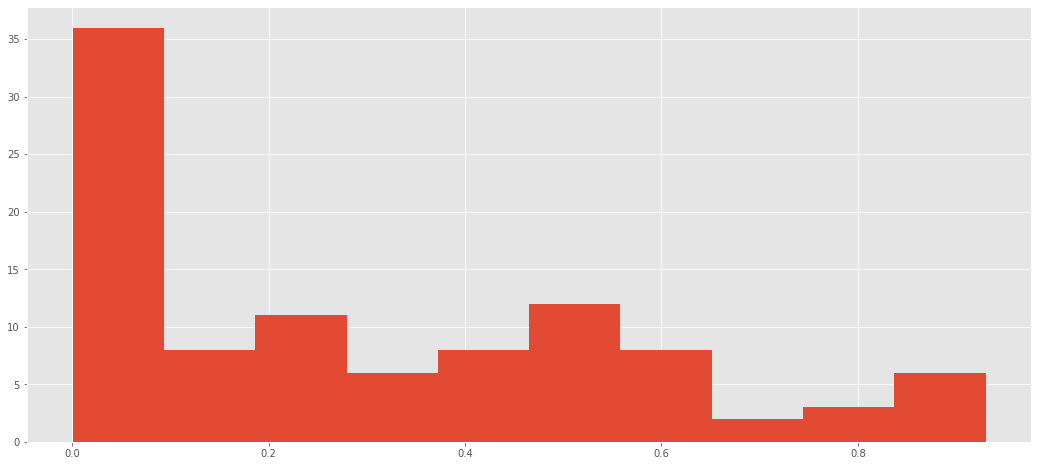

In [26]:
"CELDA N°25"
#Visualizamos los rangos de análisis de sentimiento para DETRACTOR
plt.figure(figsize=(18, 8))
plt.hist(train[train['TARGET']=="DETRACTOR"].SCORE_SENTIMENT)
plt.show()

## **IV. Modelos de NLP**

### *Bag of Words (BOW)*

El primer método para preparar la data y poder ejecutar modelos de clasificación se denomina **Bag of Words** donde se obtiene un dataset compuesto por D documentos (que representan filas o registros) y N corpus (que representan las variables predictoras)

Para nuestro ejemplo el objetivo es obtener como variables predictoras (columnas o *features*) las palabras y las filas o registros serán cada tweet.

In [27]:
"CELDA N°26"
#Importamos la librería CountVectorizer de sklearn y generamos dos dataframes: train_bow y test_bow
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000) #en nuestro caso estamos procesando tweets en inglés
train_bow = bow_vectorizer.fit_transform(train['CORPUS']) #guardamos el resultado en una variable denominada bow
test_bow = bow_vectorizer.fit_transform(test['CORPUS']) #guardamos el resultado en una variable denominada bow

### *TF-IDF*

El segundo método para preparar la data y poder ejecutar modelos de clasificación se denomina **TF - IDF** donde se obtiene un dataset conformado por los mismos elementos. Sin embargo vamos a añadir dos elementos de evaluación (como pesos para cada variable):


1.   TF = # veces que aparece una palabra en un solo documento / # palabras totales de ese mismo documento
2.   IDF = log (N/n) n es el # veces que aparece una palabra en cada documento y N es el # total de documentos


Para nuestro ejemplo recordemos que un documento es un tweet y una palabra es cada una de las palabras que hemos tokenizado y steammeado.

In [28]:
"CELDA N°27"
#Importamos la librería TfidVectorizer de sklearn y generamos dos dataframes: train_tfidf y test_tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000)
train_tfidf = tfidf_vectorizer.fit_transform(train['CORPUS'])
test_tfidf = tfidf_vectorizer.fit_transform(test['CORPUS'])

## **Partición de train y test**

### *Partición de BOW*

In [29]:
"CELDA N°28"
#Utilizamos el método train_test_split para dividir nuestra data de entrenamiento (train_bow) en train y valid
from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain_bow, yvalid_bow = train_test_split(train_bow, train['TARGET'], test_size=0.15,random_state=1)

### *Partición de TF-IDF*

In [30]:
"CELDA N°29"
#Utilizamos el método train_test_split para dividir nuestra data de entrenamiento (train_tfidf) en train y valid
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, train['TARGET'], test_size=0.15, random_state=1)

# **Modelamiento**

## I. Aplicando Modelos de Clasificación sobre BOW

### *Regresión Logística con BOW*

In [31]:
"CELDA N°30"
#Preparamos el modelo regresión logística solo en base a los datos de entrenamiento (xtrain_bow, ytrain_bow)
from sklearn.linear_model import LogisticRegression
rl_bow = LogisticRegression(n_jobs=-1, random_state=1, multi_class='ovr').fit(xtrain_bow, ytrain_bow)

In [32]:
"CELDA N°31"
#Obtenemos las predicciones del modelo de regresión logística utilizando los datos de validación (xvalid_bow)
pred_rl_bow = rl_bow.predict(xvalid_bow)

#Medimos la precisión del modelo rl_bow usando accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(yvalid_bow,pred_rl_bow)

0.7547169811320755

### *Random Forest con BOW*

In [33]:
"CELDA N°32"
#Preparamos el modelo random forest solo en base a los datos de entrenamiento (xtrain_bow, ytrain_bow)
from sklearn.ensemble import RandomForestClassifier
rf_bow = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=4, random_state=1).fit(xtrain_bow, ytrain_bow)

In [34]:
"CELDA N°33"
#Obtenemos las predicciones del modelo de random forest utilizando los datos de validación (xvalid_bow)
pred_rf_bow = rf_bow.predict(xvalid_bow)

#Medimos la precisión del modelo rf_bow usando accuracy_score
accuracy_score(yvalid_bow,pred_rf_bow)

0.7358490566037735

### *XGBoost con BOW*

In [35]:
"CELDA N°34"
#Preparamos el modelo XGBClassifier solo en base a los datos de entrenamiento (xtrain_bow, ytrain_bow)
from xgboost import XGBClassifier
xg_bow = XGBClassifier(learning_rate=0.07,
                        objective='binary:logistic',
                        n_estimators=1000,
                        n_jobs=-1,
                        max_depth=4,
                        random_state=1).fit(xtrain_bow, ytrain_bow)

In [36]:
"CELDA N°35"
#Obtenemos las predicciones del modelo XGBClassifier utilizando los datos de validación (xvalid_bow)
pred_xg_bow = xg_bow.predict(xvalid_bow)

#Medimos la precisión del modelo XGBClassifier usando accuracy_score
accuracy_score(yvalid_bow,pred_xg_bow)

0.7735849056603774

## **II. Aplicando Modelos de Clasificación sobre TF-IDF**

### *Regresión Logística sobre TF-IDF*

In [37]:
"CELDA N°36"
#Preparamos el modelo regresión logística solo en base a los datos de entrenamiento (xtrain_tfidf, ytrain_tfidf)
rl_tfidf = LogisticRegression(n_jobs=-1, random_state=1, multi_class='ovr').fit(xtrain_tfidf, ytrain_tfidf)

In [38]:
"CELDA N°37"
#Obtenemos las predicciones del modelo de regresión logística utilizando los datos de validación (xvalid_tfidf)
pred_rl_tfidf = rl_tfidf.predict(xvalid_tfidf)

#Medimos la precisión del modelo rl_tfidf usando accuracy_score
accuracy_score(yvalid_tfidf,pred_rl_tfidf)

0.7358490566037735

### *Random Forest con TF-IDF*

In [39]:
"CELDA N°38"
#Preparamos el modelo random forest solo en base a los datos de entrenamiento (xtrain_tfidf, ytrain_tfidf)
rf_tfidf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_depth=4, random_state=1).fit(xtrain_tfidf, ytrain_tfidf)

In [40]:
"CELDA N°39"
#Obtenemos las predicciones del modelo de random forest utilizando los datos de validación (xvalid_tfidf)
pred_rf_tfidf = rf_tfidf.predict(xvalid_tfidf)

#Medimos la precisión del modelo rf_tfidf usando accuracy_score
accuracy_score(yvalid_tfidf,pred_rf_tfidf)

0.7358490566037735

### *XGBoost con TF-IDF*

In [41]:
"CELDA N°40"
#Preparamos el modelo XGBClassifier solo en base a los datos de entrenamiento (xtrain_tfidf, ytrain_tfidf)
from xgboost import XGBClassifier
xg_tfidf = XGBClassifier(learning_rate=0.07,
                        objective='binary:logistic',
                        n_estimators=1000,
                        n_jobs=-1,
                        max_depth=4,
                        random_state=1).fit(xtrain_tfidf, ytrain_tfidf)

In [42]:
"CELDA N°41"
#Obtenemos las predicciones del modelo XGBClassifier utilizando los datos de validación (xvalid_tfidf)
pred_xg_tfidf = xg_tfidf.predict(xvalid_tfidf)

#Medimos la precisión del modelo xg_tfidf usando accuracy_score
accuracy_score(yvalid_tfidf,pred_xg_tfidf)

0.7735849056603774

# **Evaluación**

In [43]:
"CELDA N°42"
#Para el adecuado cálculo de las métricas es necesario hacer una conversión previa de palabras a números
yvalid_bow = pd.DataFrame(yvalid_bow).replace({"DETRACTOR":0, "PROMOTOR":1})
yvalid_tfidf = pd.DataFrame(yvalid_tfidf).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_rl_bow = pd.DataFrame(pred_rl_bow).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_rf_bow = pd.DataFrame(pred_rf_bow).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_xg_bow = pd.DataFrame(pred_xg_bow).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_rl_tfidf = pd.DataFrame(pred_rl_tfidf).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_rf_tfidf = pd.DataFrame(pred_rf_tfidf).replace({"DETRACTOR":0, "PROMOTOR":1})
pred_xg_tfidf = pd.DataFrame(pred_xg_tfidf).replace({"DETRACTOR":0, "PROMOTOR":1})

In [44]:
"CELDA N°43"
#Definimos una lista de métricas y creamos una función para calcular todas las métricas
from sklearn.metrics import precision_score, recall_score, f1_score
lista_metricas=[accuracy_score,precision_score,recall_score,f1_score]
def calcula_scores_modelo(real, prediccion, array=None):
    if array is None:
        array =  []
    else:
        pass
    for metrica in lista_metricas:
        array.append(metrica(real, prediccion))

    return array

In [45]:
"CELDA N°44"
#Calculamos todas las métricas para cada moddelo de NLP: BOW, TF-IDF
score_rl_bow = calcula_scores_modelo(yvalid_bow,pred_rl_bow)
score_rf_bow = calcula_scores_modelo(yvalid_bow,pred_rf_bow)
score_xgb_bow = calcula_scores_modelo(yvalid_bow,pred_xg_bow)

score_rl_tfidf = calcula_scores_modelo(yvalid_bow,pred_rf_bow)
score_rf_tfidf = calcula_scores_modelo(yvalid_bow,pred_rf_bow)
score_xgb_tfidf = calcula_scores_modelo(yvalid_bow,pred_xg_tfidf)

In [46]:
"CELDA N°45"
#Generamos una tabla donde se consolide todos los indicadores
tabla_score = {'RegLogistica_BOW': score_rl_bow,
               'RandomForest_BOW': score_rf_bow,
               'XGBoost_BOW': score_xgb_bow,
               'RegLogistica_TF_IDF': score_rl_tfidf,
               'RandomForest_TF_IDF': score_rf_tfidf,
               'XGBoost_TF_IDF': score_xgb_tfidf}

tabla_score = pd.DataFrame(tabla_score)  
tabla_score.index = ['accuracy_score','precision_score','recall_score','f1_score']
tabla_score

,RegLogistica_BOW,RandomForest_BOW,XGBoost_BOW,RegLogistica_TF_IDF,RandomForest_TF_IDF,XGBoost_TF_IDF
accuracy_score,0.754717,0.735849,0.773585,0.735849,0.735849,0.773585
precision_score,0.842105,0.735849,0.829268,0.735849,0.735849,0.864865
recall_score,0.820513,1.000000,0.871795,1.000000,1.000000,0.820513
f1_score,0.831169,0.847826,0.850000,0.847826,0.847826,0.842105
